In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

In [3]:
cars_df = pd.read_csv(filepath_or_buffer='car_data.csv')
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars_df.info()
print(r"this information tells us that there are 205 entries and 205 non-null, so there are no missing values in this dataset")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars_df['car_company'] = cars_df['CarName'].apply(lambda comp : comp.split(' ')[0].lower())
unique_companies = np.array(cars_df['car_company'].unique())
print(r"the unique companies in our dataset are: ")
print(unique_companies)

the unique companies in our dataset are: 
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [7]:
cars_df['car_company'].replace({'toyouta' : 'toyota', 'porcshce' : 'porsche', 'maxda' : 'mazda',
    'vokswagen' : 'volkswagen', 'vw' : 'volkswagen'}, inplace = True)
unique_companies = np.array(cars_df['car_company'].unique())
print(r"the unique companies in our dataset are: ")
print(unique_companies)

the unique companies in our dataset are: 
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


/var/folders/rn/j7z9qkxj3t73405fs5pmn5lh0000gn/T/ipykernel_16614/14493361.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


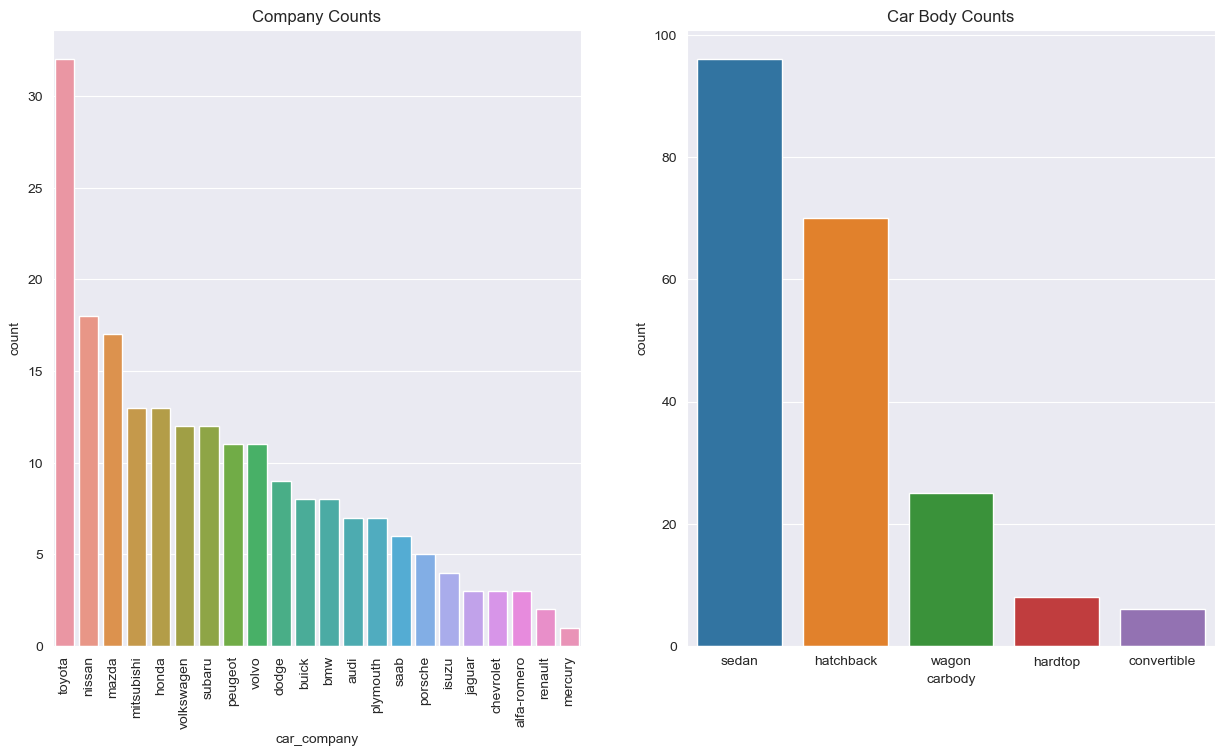

From the Company Counts plot, we see that toyota is the most popular company, and mercury is least popular.
From the Car Body Counts plot, we see that sedan is the most popular car body, and convertible is least popular.


In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Company Counts')
sns.countplot(x = cars_df['car_company'], order = cars_df['car_company'].value_counts().index,
              ax=axes[0])
sns.countplot(x = cars_df['carbody'], order = cars_df['carbody'].value_counts().index,
              ax=axes[1])
axes[1].set_title('Car Body Counts')
plt.show()
print(r"From the Company Counts plot, we see that toyota is the most popular company, and mercury is least popular.")
print(r"From the Car Body Counts plot, we see that sedan is the most popular car body, and convertible is least popular.")

the most expensive average price by company is the jaguar and the least expensive average price is chevrolet
the most expensive average price is the hardtop and the least expensive average price is the hatchback


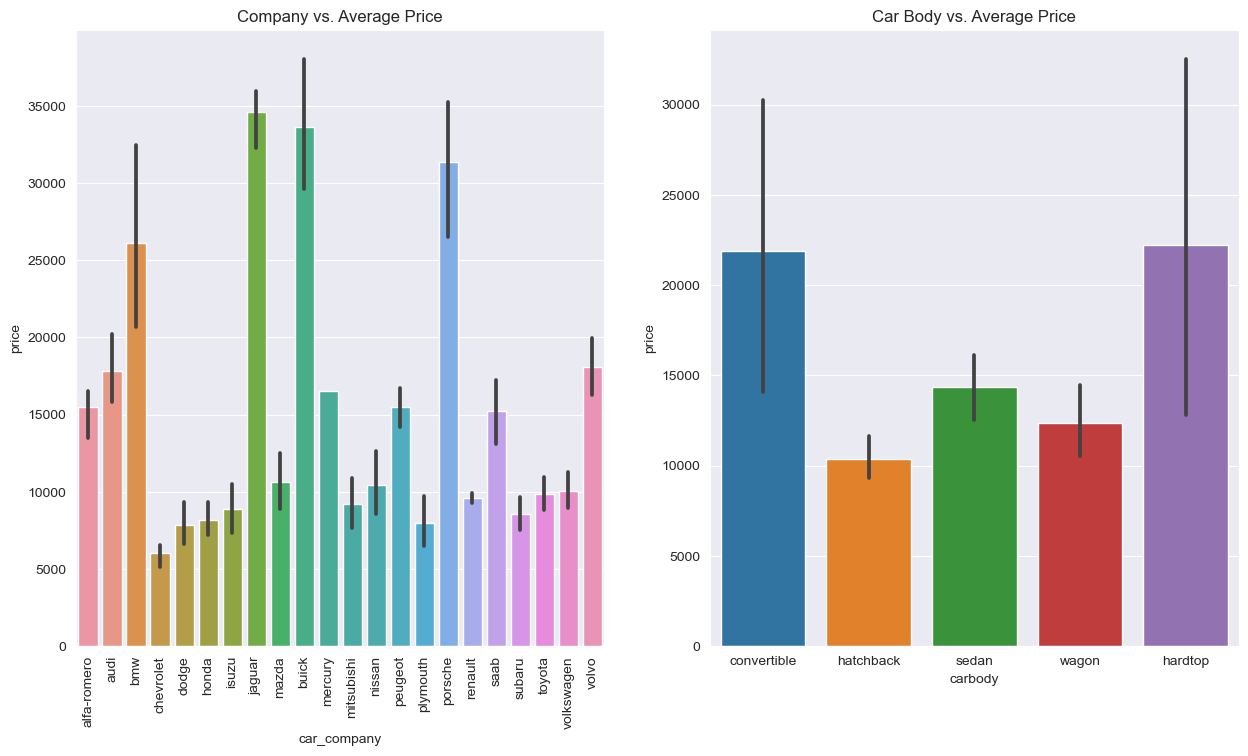

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
sns.barplot(x = 'car_company', y= 'price', data = cars_df, 
            ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Company vs. Average Price')
sns.barplot(x = 'carbody', y= 'price', data = cars_df, 
            ax=axes[1])
axes[1].set_title('Car Body vs. Average Price')
print(r"the most expensive average price by company is the jaguar and the least expensive average price is chevrolet")
print(r"the most expensive average price is the hardtop and the least expensive average price is the hatchback")

0 is the most popular symboling and -2 is the least popular.
-1 symbol has the largest range in price.


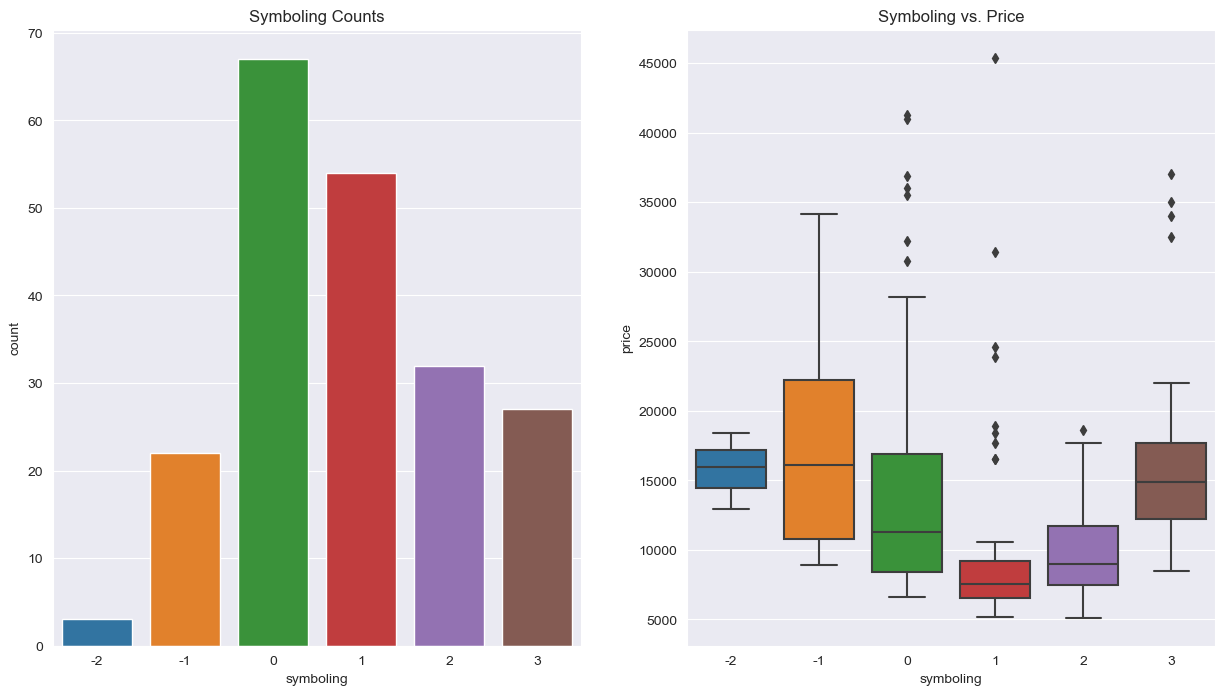

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
axes[0].set_title('Symboling Counts')
sns.countplot(x = cars_df['symboling'], ax=axes[0])
sns.boxplot(x = cars_df['symboling'], y = cars_df['price'],ax=axes[1])
axes[1].set_title('Symboling vs. Price')
print(r"0 is the most popular symboling and -2 is the least popular.")
print(r"-1 symbol has the largest range in price.")

ohc is the most popular engine type
ohcv has the largest range in terms of price


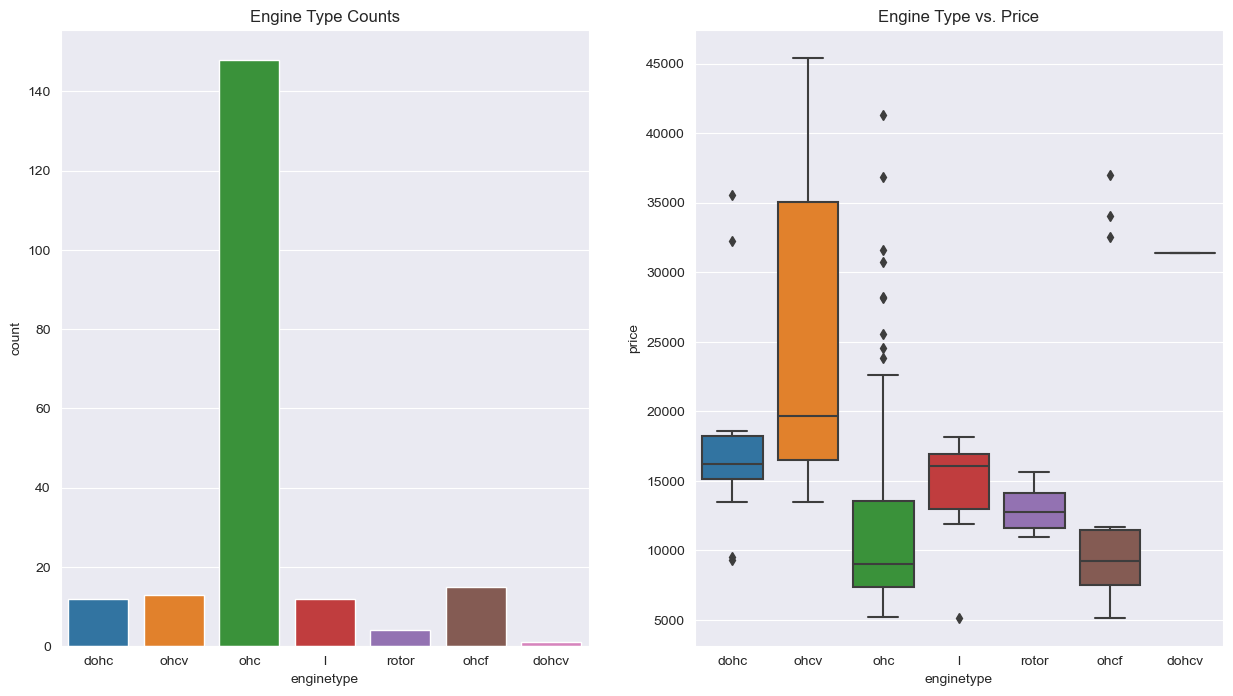

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
axes[0].set_title('Engine Type Counts')
sns.countplot(x = cars_df['enginetype'], ax=axes[0])
sns.boxplot(x = cars_df['enginetype'], y = cars_df['price'],ax=axes[1])
axes[1].set_title('Engine Type vs. Price')
print(r"ohc is the most popular engine type")
print(r"ohcv has the largest range in terms of price")

four is the most popular cylinder number
six cylinders has the largest range in terms of price


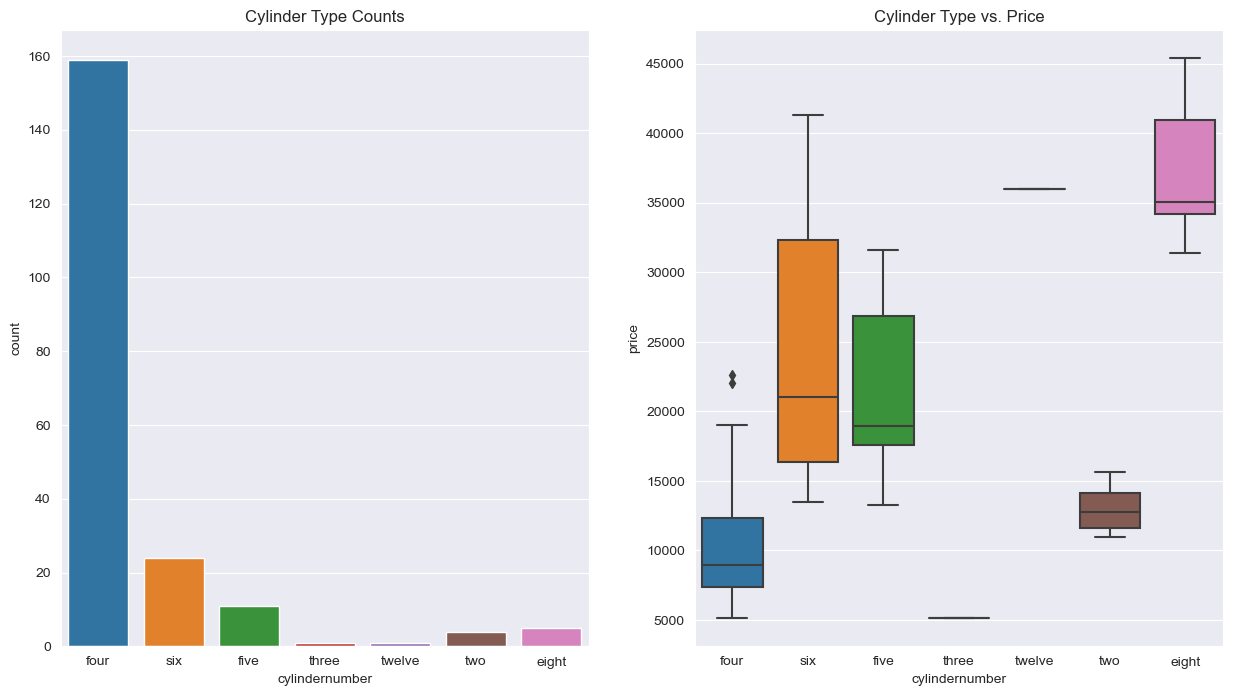

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
axes[0].set_title('Cylinder Type Counts')
sns.countplot(x = cars_df['cylindernumber'], ax=axes[0])
sns.boxplot(x = cars_df['cylindernumber'], y = cars_df['price'],ax=axes[1])
axes[1].set_title('Cylinder Type vs. Price')
print(r"four is the most popular cylinder number")
print(r"six cylinders has the largest range in terms of price")

mpfiis the most popular fuel system
idi has the largest range in terms of price


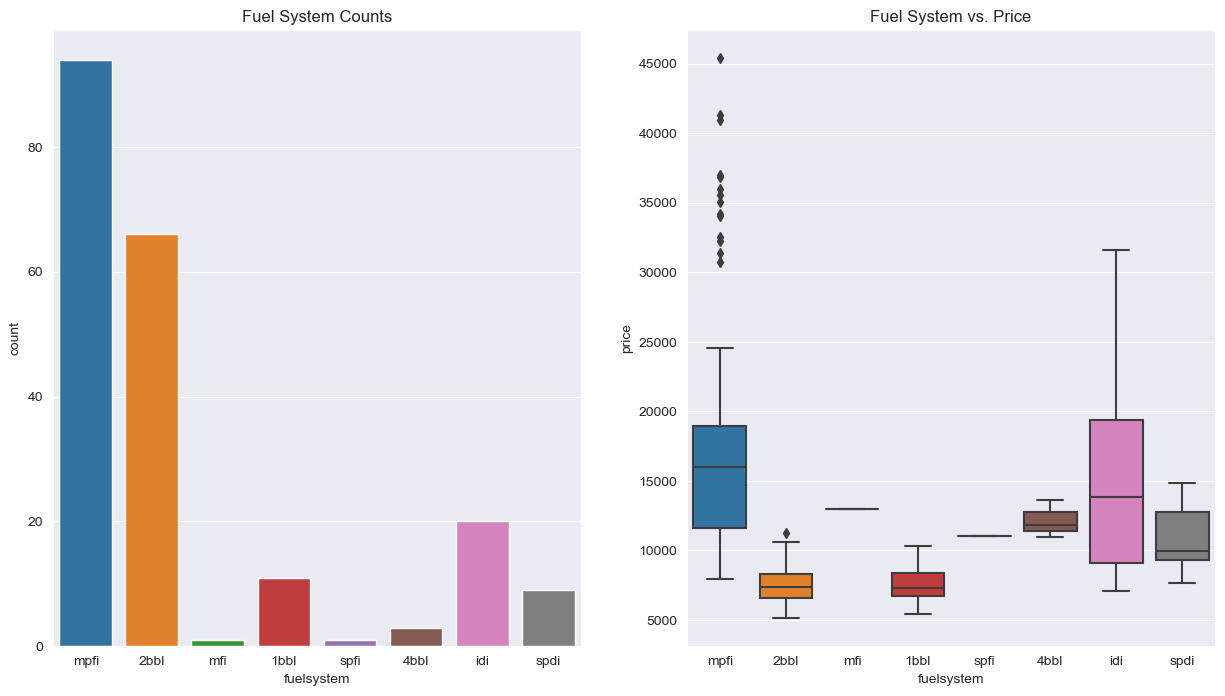

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
axes[0].set_title('Fuel System Counts')
sns.countplot(x = cars_df['fuelsystem'], ax=axes[0])
sns.boxplot(x = cars_df['fuelsystem'], y = cars_df['price'],ax=axes[1])
axes[1].set_title('Fuel System vs. Price')
print(r"mpfiis the most popular fuel system")
print(r"idi has the largest range in terms of price")

fwd the most popular drive wheel count
rwd has the largest range in terms of price


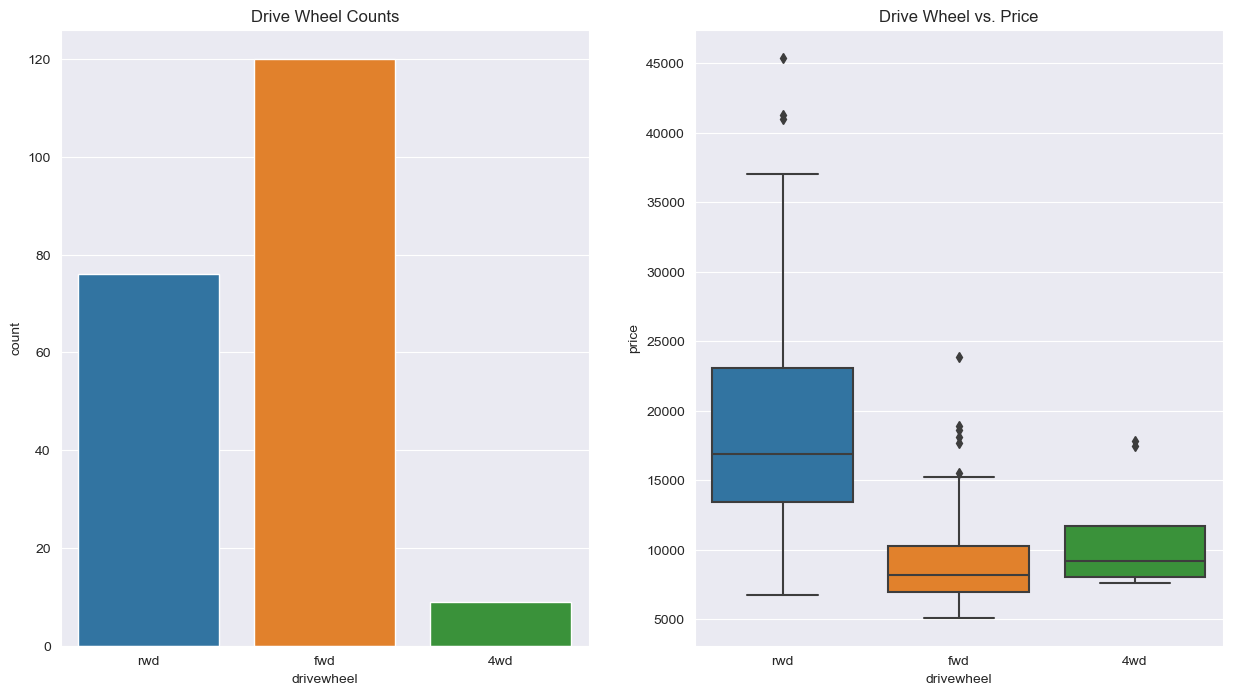

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
axes[0].set_title('Drive Wheel Counts')
sns.countplot(x = cars_df['drivewheel'], ax=axes[0])
sns.boxplot(x = cars_df['drivewheel'], y = cars_df['price'],ax=axes[1])
axes[1].set_title('Drive Wheel vs. Price')
print(r"fwd the most popular drive wheel count")
print(r"rwd has the largest range in terms of price")

front is the most popular engine location
front has the largest range in terms of price


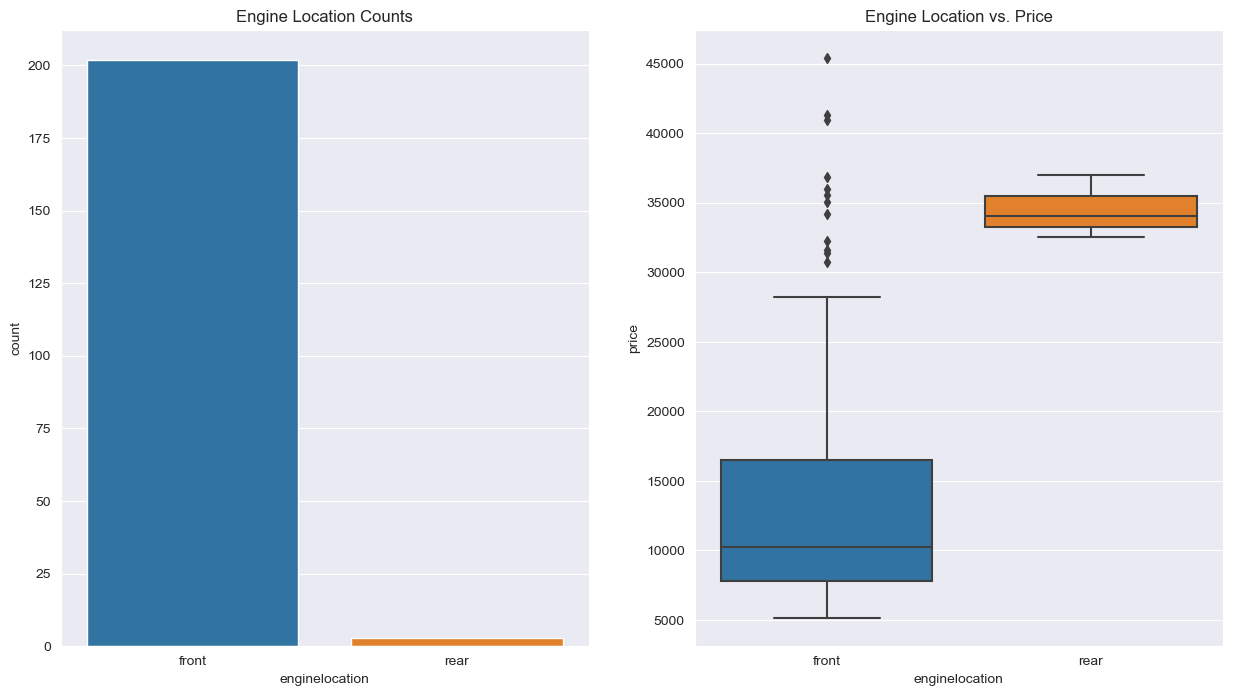

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
axes[0].set_title('Engine Location Counts')
sns.countplot(x = cars_df['enginelocation'], ax=axes[0])
sns.boxplot(x = cars_df['enginelocation'], y = cars_df['price'],ax=axes[1])
axes[1].set_title('Engine Location vs. Price')
print(r"front is the most popular engine location")
print(r"front has the largest range in terms of price")

gas is the most popular fuel type
gas has the largest range in terms of price


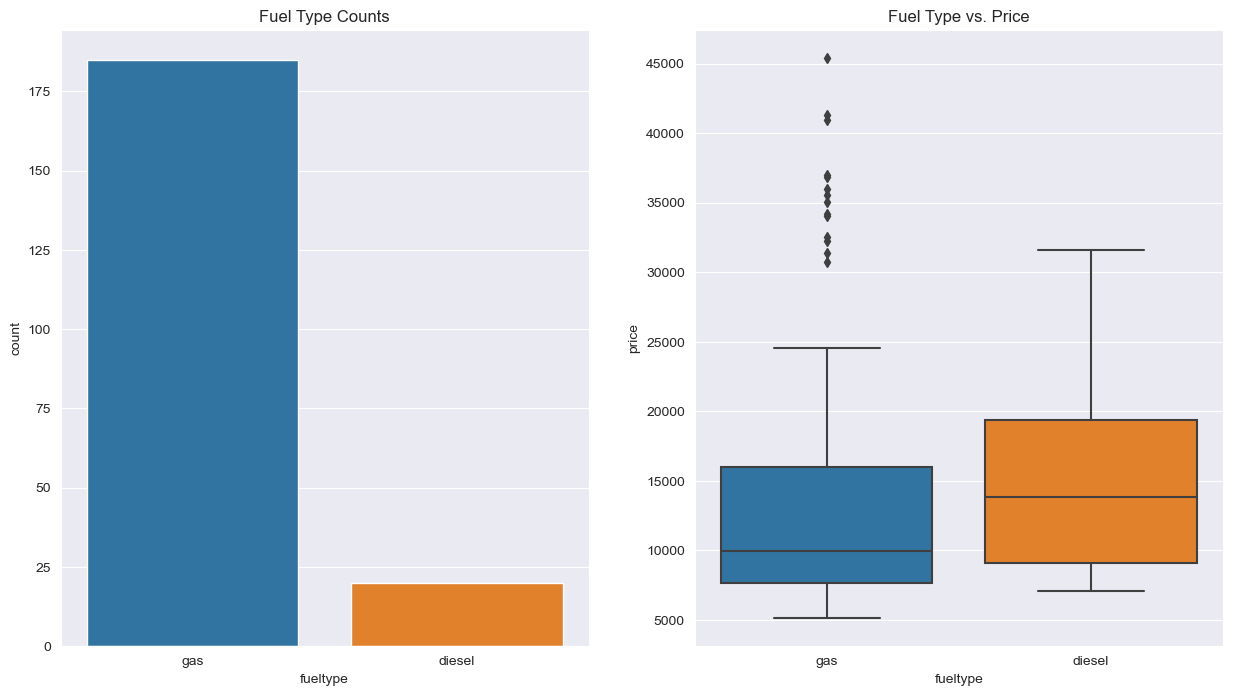

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
axes[0].set_title('Fuel Type Counts')
sns.countplot(x = cars_df['fueltype'], ax=axes[0])
sns.boxplot(x = cars_df['fueltype'], y = cars_df['price'],ax=axes[1])
axes[1].set_title('Fuel Type vs. Price')
print(r"gas is the most popular fuel type")
print(r"gas has the largest range in terms of price")

four is the most popular number of doors
two has the largest range in terms of price


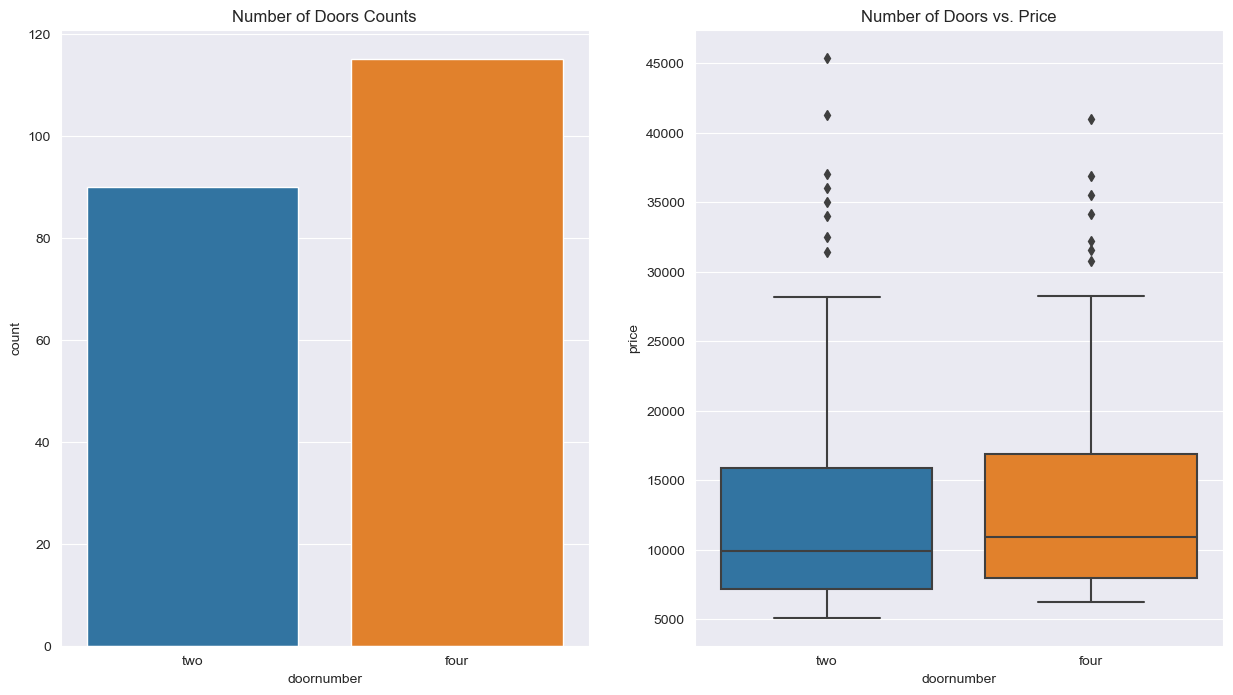

In [17]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
axes[0].set_title('Number of Doors Counts')
sns.countplot(x = cars_df['doornumber'], ax=axes[0])
sns.boxplot(x = cars_df['doornumber'], y = cars_df['price'],ax=axes[1])
axes[1].set_title('Number of Doors vs. Price')
print(r"four is the most popular number of doors")
print(r"two has the largest range in terms of price")

std is the most popular aspiration
std has the largest range in terms of price


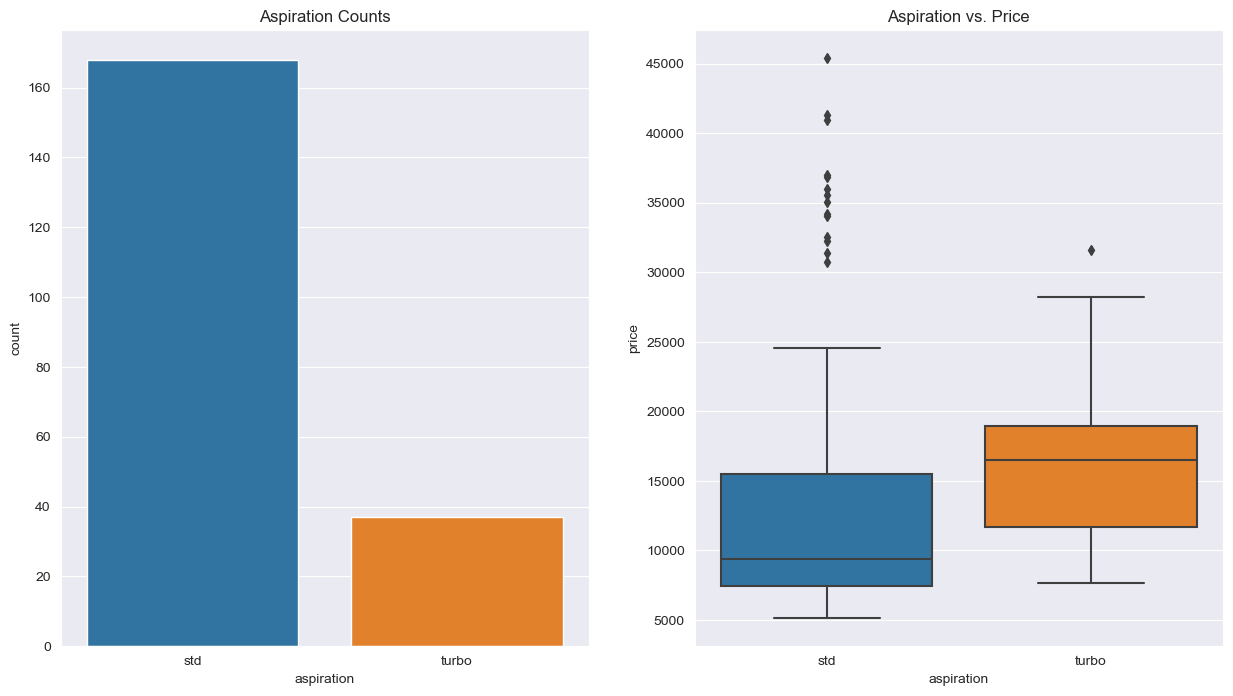

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
axes[0].set_title('Aspiration Counts')
sns.countplot(x = cars_df['aspiration'], ax=axes[0])
sns.boxplot(x = cars_df['aspiration'], y = cars_df['price'],ax=axes[1])
axes[1].set_title('Aspiration vs. Price')
print(r"std is the most popular aspiration")
print(r"std has the largest range in terms of price")

around 5000 is the most popular price
most prices range from 5000 to 28000


/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


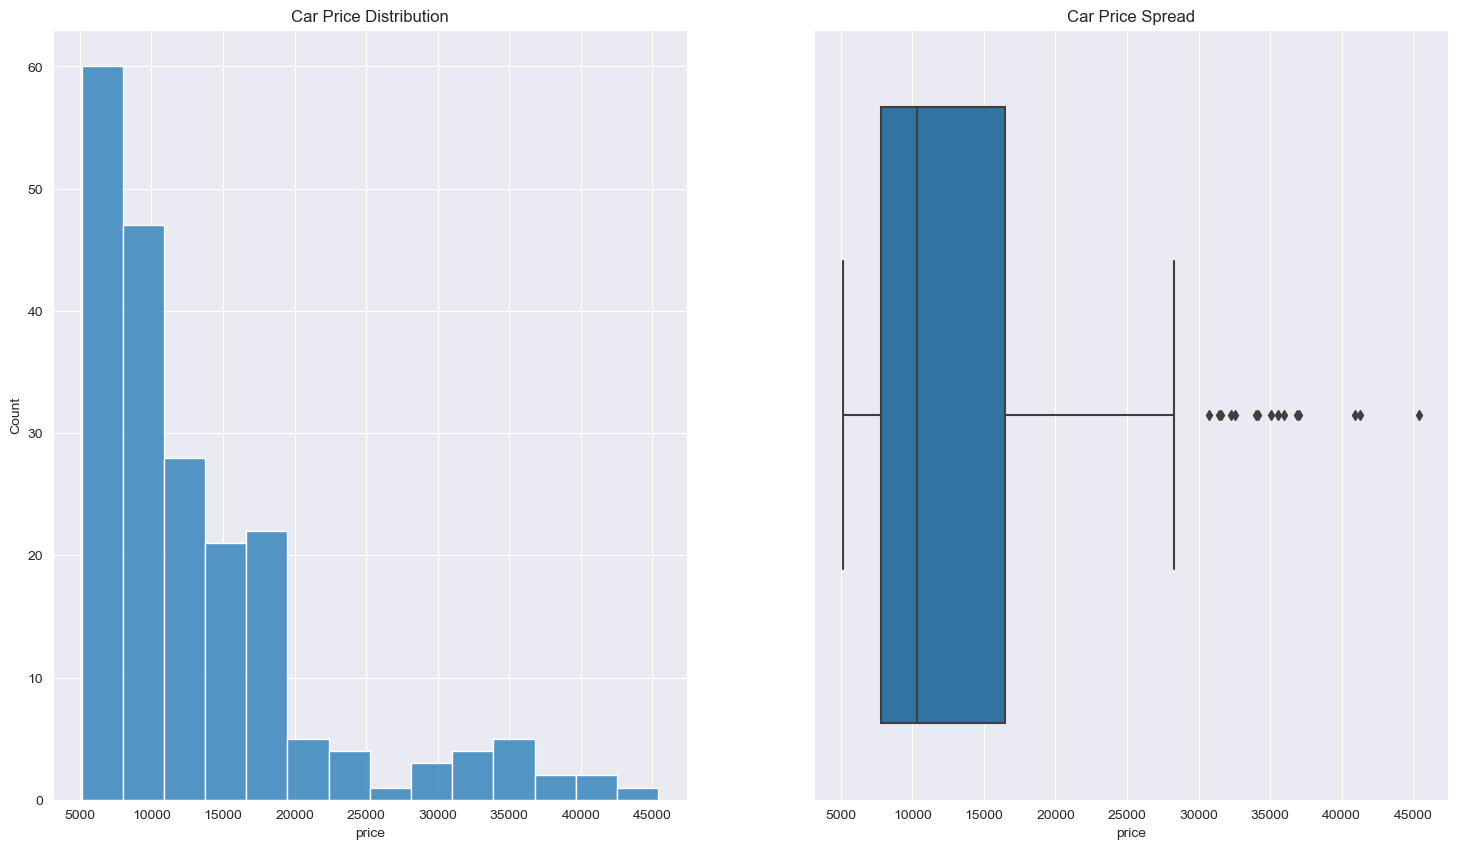

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,10))
axes[0].set_title('Car Price Distribution')
sns.histplot(x = cars_df['price'], ax=axes[0])
sns.boxplot(x = cars_df['price'],ax=axes[1])
axes[1].set_title('Car Price Spread')
print(r"around 5000 is the most popular price")
print(r"most prices range from 5000 to 28000")

there are mainly linear relationships between car length, width, weight,and height compared to price.
car height and price has data that has a weak positive correlation and i smore spread out
length, width, and weight have stronger positive correlations with height


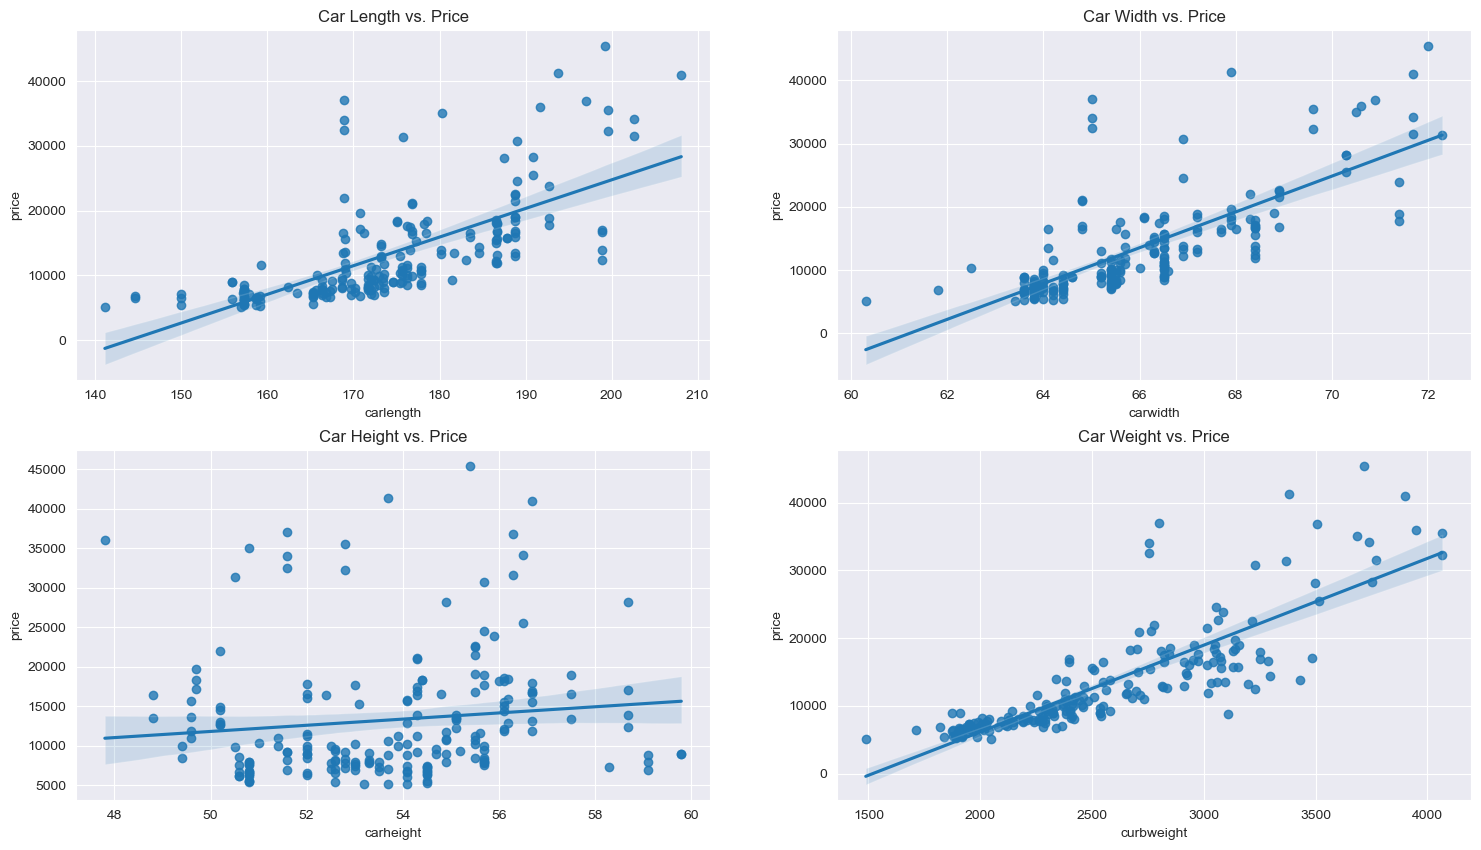

In [20]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (18,10))
axes[0][0].set_title('Car Length vs. Price')
sns.regplot(x = cars_df['carlength'], y = cars_df['price'],ax=axes[0][0])
sns.regplot(x = cars_df['carwidth'], y = cars_df['price'],ax=axes[0][1])
sns.regplot(x = cars_df['carheight'], y = cars_df['price'],ax=axes[1][0])
sns.regplot(x = cars_df['curbweight'], y = cars_df['price'],ax=axes[1][1])

axes[0][1].set_title('Car Width vs. Price')
axes[1][0].set_title('Car Height vs. Price')
axes[1][1].set_title('Car Weight vs. Price')
print(r"there are mainly linear relationships between car length, width, weight,and height compared to price.")
print(r"car height and price has data that has a weak positive correlation and i smore spread out")
print(r"length, width, and weight have stronger positive correlations with height")

engine size, boreratio, horse power, wheel base have positive correlations to price 
stroke and compression ratio have weak positive correlations to price
peak rpm has a weak negative correlation to price
city mpg and highway mpg have negative correlations to price


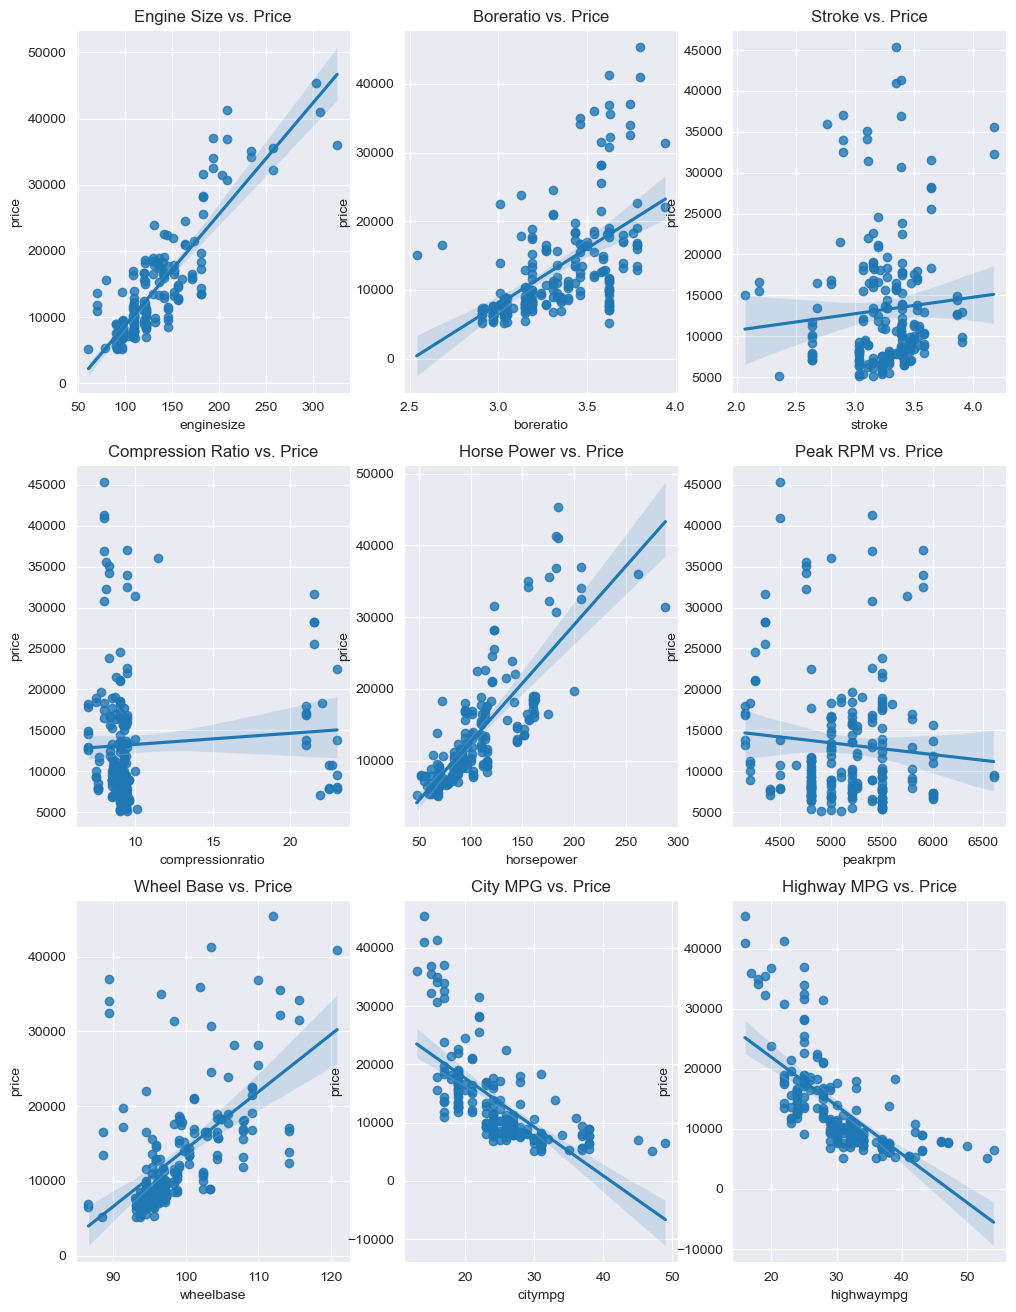

In [21]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (12,16))

sns.regplot(x = cars_df['enginesize'], y = cars_df['price'],ax=axes[0][0])
sns.regplot(x = cars_df['boreratio'], y = cars_df['price'],ax=axes[0][1])
sns.regplot(x = cars_df['stroke'], y = cars_df['price'],ax=axes[0][2])

sns.regplot(x = cars_df['compressionratio'], y = cars_df['price'],ax=axes[1][0])
sns.regplot(x = cars_df['horsepower'], y = cars_df['price'],ax=axes[1][1])
sns.regplot(x = cars_df['peakrpm'], y = cars_df['price'],ax=axes[1][2])

sns.regplot(x = cars_df['wheelbase'], y = cars_df['price'],ax=axes[2][0])
sns.regplot(x = cars_df['citympg'], y = cars_df['price'],ax=axes[2][1])
sns.regplot(x = cars_df['highwaympg'], y = cars_df['price'],ax=axes[2][2])

axes[0][0].set_title('Engine Size vs. Price')
axes[0][1].set_title('Boreratio vs. Price')
axes[0][2].set_title('Stroke vs. Price')

axes[1][0].set_title('Compression Ratio vs. Price')
axes[1][1].set_title('Horse Power vs. Price')
axes[1][2].set_title('Peak RPM vs. Price')

axes[2][0].set_title('Wheel Base vs. Price')
axes[2][1].set_title('City MPG vs. Price')
axes[2][2].set_title('Highway MPG vs. Price')

print(r"engine size, boreratio, horse power, wheel base have positive correlations to price ")
print(r"stroke and compression ratio have weak positive correlations to price")
print(r"peak rpm has a weak negative correlation to price")
print(r"city mpg and highway mpg have negative correlations to price")

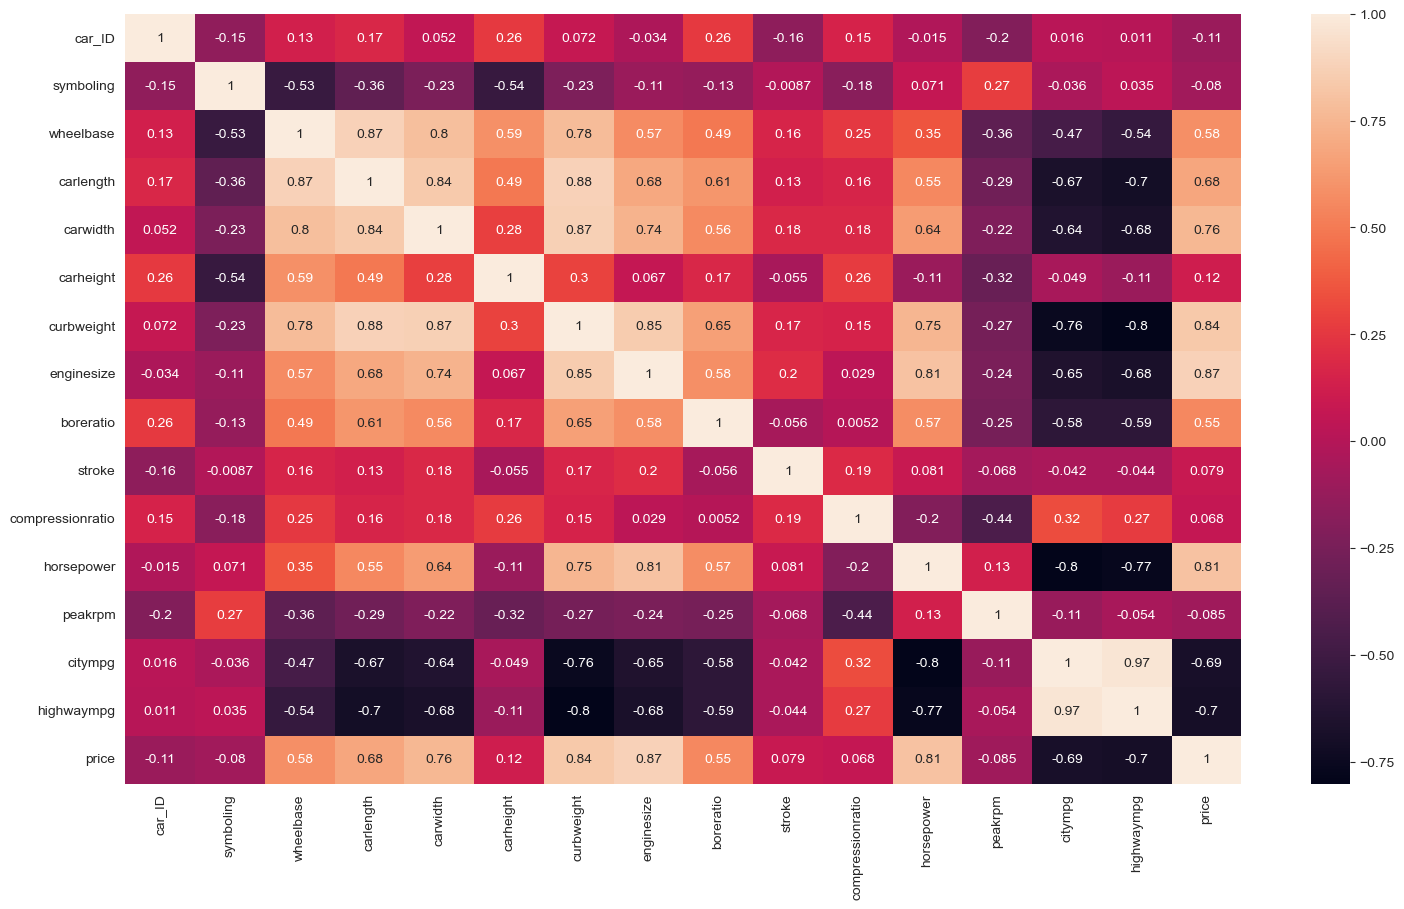

city mpg and highway mpg can be combined into a single feature called fuel_economy


In [22]:
num_cols = cars_df[['car_ID','symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
                   'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]

plt.figure(figsize=(18,10))
sns.heatmap(num_cols.corr(), annot = True)
plt.show()
print(r"city mpg and highway mpg can be combined into a single feature called fuel_economy")

In [23]:
cars_df['fuel_economy'] = cars_df['citympg']*0.55 + cars_df['highwaympg']*0.45
cars_df.drop(columns = 'CarName', inplace = True)
cars_df.head()
print(r"I believe carwidth, curbweight, enginesize, and horsepower are the most significant in predicting price,")
print(r"because of their high correlation value with price on the heatmap")

I believe carwidth, curbweight, enginesize, and horsepower are the most significant in predicting price,
because of their high correlation value with price on the heatmap


In [24]:
cars_df = pd.get_dummies(data = cars_df, columns = ['car_company', 'fueltype', 'aspiration', 'doornumber',
                                                   'carbody','drivewheel', 'enginelocation', 'enginetype',
                                                   'cylindernumber','fuelsystem'], drop_first = True)
cars_df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,False,False,False,False,False,False,False,True,False,False
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X, y = cars_df.drop(columns = ['price','car_ID']),cars_df['price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

scaler = StandardScaler()  
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

ridge = Ridge().fit(X_train_scaled, y_train)  
X_test_scaled = scaler.transform(X_test)  
R2 = ridge.score(X_test_scaled, y_test)

/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


R-Squared:  0.9010726309143803


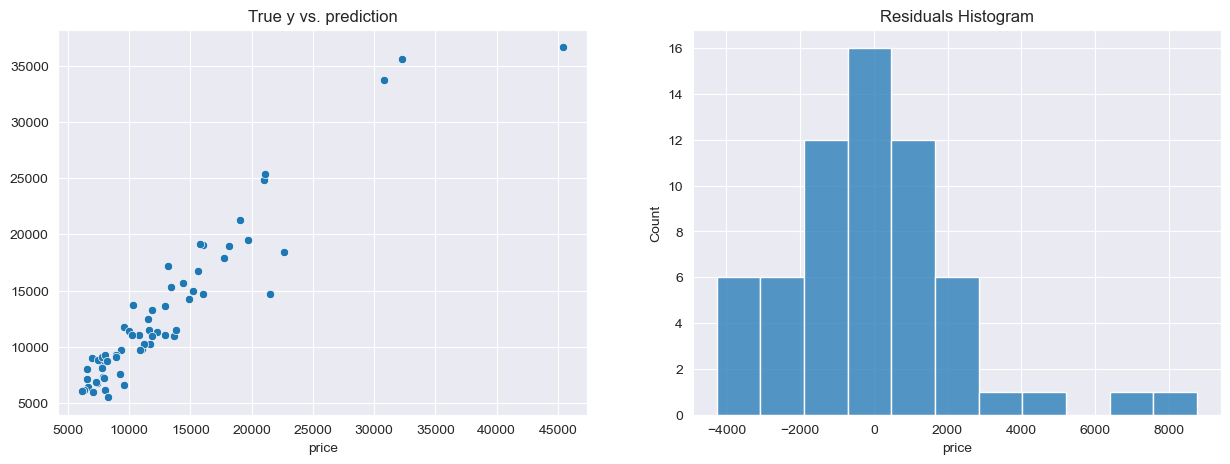

In [26]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
prediction = lm.predict(X_test)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
axes[0].set_title('True y vs. prediction')
sns.scatterplot(x = y_test, y = prediction, ax=axes[0])

residual = y_test - prediction
sns.histplot(x = residual, ax=axes[1])
axes[1].set_title('Residuals Histogram')

ridge = Ridge().fit(X_train_scaled, y_train)  
X_test_scaled = scaler.transform(X_test)  
R2 = ridge.score(X_test_scaled, y_test)
print(r"R-Squared: ", R2)

In [27]:
coeff_df = pd.DataFrame(lm.coef_,X.columns, columns = ['Coefficient'])

print(r"For the coefficients, for each feature:")
print(r"while holding all other features fixed, a 1 unit increase in that feature is associated with a increase")
print(r"(or decrease if the coefficient is negative) of the coefficient's value in dollars.")
print(r"In conclusion, the true y vs. prediction plot shows us that the linear regression model follows very close")
print(r"to the regard of all the features combined vs. price.")
print(r"The residuals histogram shows that the predictions were not very far off of the actual prices.")
print(r"The r-squared value shows us that the variables are strongly accurate in describing the price of the car.")
print(r"In the previous parts, we discovered that carwidth, curbweight, enginesize, and horsepower are the most")
print(r"significant in predicting price because of their strong correlation on the heatmap.")
coeff_df

For the coefficients, for each feature:
while holding all other features fixed, a 1 unit increase in that feature is associated with a increase
(or decrease if the coefficient is negative) of the coefficient's value in dollars.
In conclusion, the true y vs. prediction plot shows us that the linear regression model follows very close
to the regard of all the features combined vs. price.
The residuals histogram shows that the predictions were not very far off of the actual prices.
The r-squared value shows us that the variables are strongly accurate in describing the price of the car.
In the previous parts, we discovered that carwidth, curbweight, enginesize, and horsepower are the most
significant in predicting price because of their strong correlation on the heatmap.


,Coefficient
symboling,-57.044766
wheelbase,277.788984
carlength,-183.275741
carwidth,480.164427
carheight,-331.360868
...,...
fuelsystem_idi,1185.793300
fuelsystem_mfi,0.000000
fuelsystem_mpfi,921.707817
fuelsystem_spdi,30.018071
